In [1]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
for dirpath,dirnames,filenames in os.walk("drive/MyDrive/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in 'drive/MyDrive/COVID_IEEE'.
there are 0 directories and 619 images in 'drive/MyDrive/COVID_IEEE/virus'.
there are 0 directories and 668 images in 'drive/MyDrive/COVID_IEEE/normal'.
there are 0 directories and 536 images in 'drive/MyDrive/COVID_IEEE/covid'.


In [3]:
data_dir = pathlib.Path("drive/MyDrive/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [5]:
def display_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    print(f"image shape {img.shape}")
    
    return img

image shape (1164, 1372)
image shape (952, 1288)
image shape (480, 640, 3)


Text(0.5, 1.0, 'Covid')

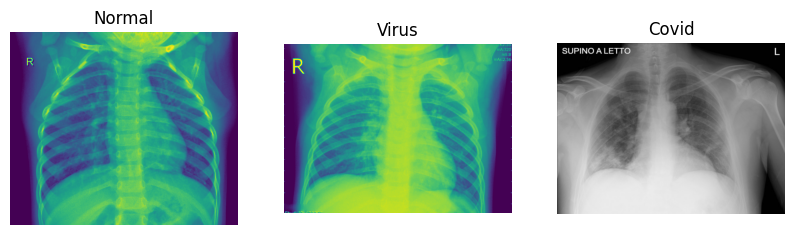

In [6]:
img_normal = display_image("drive/MyDrive/COVID_IEEE/","normal")
img_virus = display_image("drive/MyDrive/COVID_IEEE/","virus")
img_covid = display_image("drive/MyDrive/COVID_IEEE/","covid")

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img_normal)
plt.axis('off')
plt.title("Normal")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img_virus)
plt.axis('off')
plt.title("Virus")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(img_covid)
plt.axis('off')
plt.title("Covid")

In [7]:
data=[]
labels=[]

In [8]:
normal=os.listdir("drive/MyDrive/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("drive/MyDrive/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224),fx=0,fy=0)



    data.append(image)
    labels.append(0)

In [9]:
virus=os.listdir("drive/MyDrive/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("drive/MyDrive/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
    
    data.append(image)
    labels.append(1)

In [10]:
covid=os.listdir("drive/MyDrive/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("drive/MyDrive/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224),fx=0.25,fy=0.25, interpolation=cv2.INTER_AREA)


    data.append(image)
    labels.append(2)

In [11]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [13]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [15]:
model.fit(X_train, y_train, validation_split=0.3, epochs=5, batch_size=32)

Epoch 1/5
32/32 [==============================] - 484s 15s/step - loss: 0.8795 - accuracy: 0.5608 - val_loss: 0.6138 - val_accuracy: 0.7078
Epoch 2/5
32/32 [==============================] - 509s 16s/step - loss: 0.5290 - accuracy: 0.7941 - val_loss: 0.4747 - val_accuracy: 0.8082
Epoch 3/5
32/32 [==============================] - 512s 16s/step - loss: 0.3288 - accuracy: 0.8882 - val_loss: 0.3364 - val_accuracy: 0.8744
Epoch 4/5
32/32 [==============================] - 508s 16s/step - loss: 0.2254 - accuracy: 0.9265 - val_loss: 0.2592 - val_accuracy: 0.9201
Epoch 5/5
32/32 [==============================] - 472s 15s/step - loss: 0.1549 - accuracy: 0.9431 - val_loss: 0.3193 - val_accuracy: 0.9201


Text(0.5, 1.0, 'Training-Validation Accuracy')

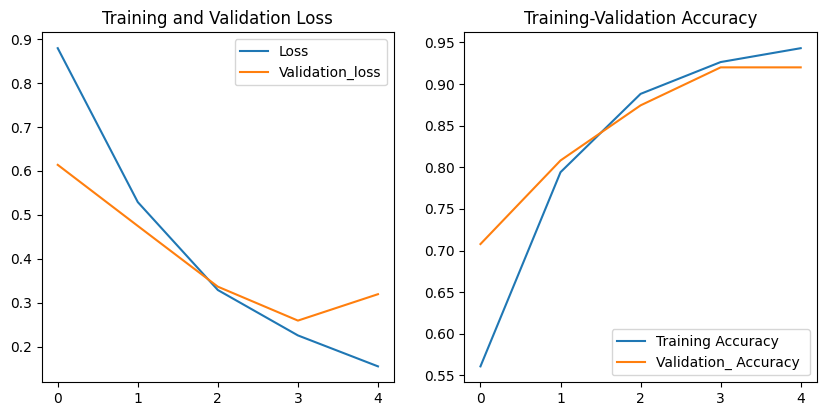

In [16]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [17]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

12/12 [==============================] - 42s 3s/step


In [18]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       139
           1       0.88      0.93      0.90       113
           2       0.95      0.95      0.95       113

    accuracy                           0.93       365
   macro avg       0.93      0.93      0.93       365
weighted avg       0.93      0.93      0.93       365



In [19]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,127,10,2
normal,4,105,4
virus,1,5,107


In [21]:
ypred = model.predict(X_test)

total = 0
accurate = 0
accurateindex = []
for i in range(len(ypred)):
    if np.argmax(ypred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

12/12 [==============================] - 38s 3s/step
Total-test-data; 365 	accurately-predicted-data: 339 	 wrongly-predicted-data:  26
Accuracy: 92.877 %


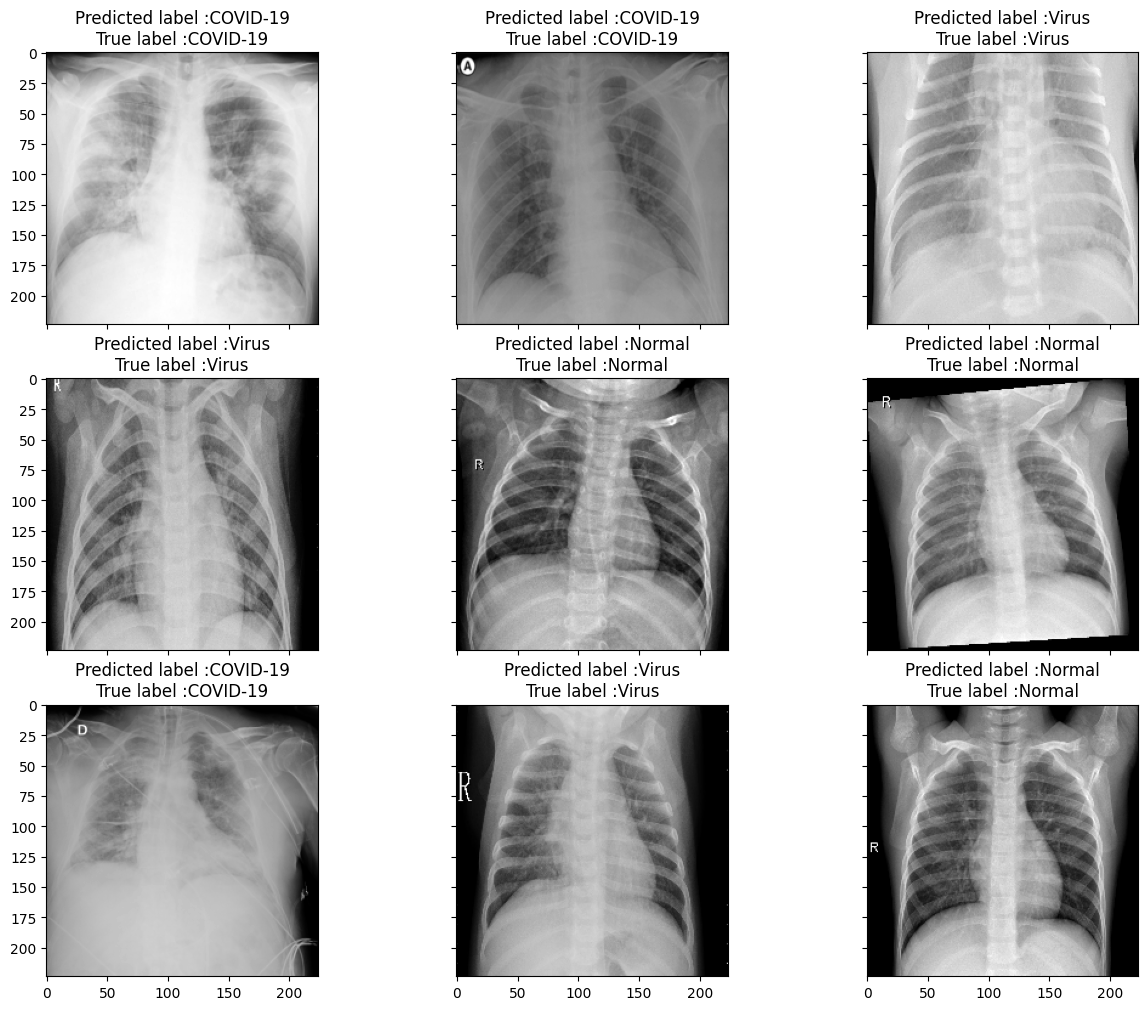

In [22]:
label= ['Normal', 'Virus', 'COVID-19']
imidx = random.sample(accurateindex, k=9)# replace with 'wrongindex'

nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15, 12))
k=0
n = 0
for row in range(nrows):
    for col in range(ncols):
        ax[row,col].imshow(X_test[imidx[n]][:,:,0], cmap='gray')
        ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(label[np.argmax(ypred[imidx[n]])], label[np.argmax(y_test[imidx[n]])]))
        n += 1
